In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/project3

/content/drive/MyDrive/project3


In [ ]:
#

[Errno 2] No such file or directory: '/content/drive/MyDrive/MasterCourse/Week 12 - Natural Language Processing/Lecture 51 - Multilabel Text Classification'
/content/drive/MyDrive/project3


In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/project3/final_preprocessed_data.csv")
df

,Title,Description,Genre
0,Attack on Titan The Final Season: The Final Chapters,Final part of Attack on Titan The Final Season.,"['Action', 'Drama', 'Fantasy', 'Shounen', 'Dark Fantasy', 'Military', 'War', 'Based on a Manga']"
1,Fruits Basket the Final Season,The final arc of Fruits Basket.,"['Drama', 'Fantasy', 'Romance', 'Shoujo', 'Animal Transformation', 'Contemporary Fantasy', 'Curse', 'Dysfunctional Families', 'Mental Illness', 'Orphans', 'Zodiac', 'Based on a Manga']"
2,Fullmetal Alchemist: Brotherhood,"The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affix Al's soul to a suit of armor. When his missing limbs are replaced by auto mail parts, Ed bears the name of...","['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Shounen', 'Conspiracy', 'Death of a Loved One', 'Military', 'Siblings', 'Based on a Manga']"
3,Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,"Tanjiro and his friends accompany the Hashira Tengen Uzui to an entertainment district where Tengen’s female ninja agents were gathering information on a demon before they suddenly disappeared. In order to investigate, Tanjiro and the others disguise themselves as women to sneak in!","['Action', 'Adventure', 'Shounen', 'Demons', 'Historical', 'Martial Arts', 'Orphans', 'Siblings', 'Supernatural', 'Swordplay', 'Based on a Manga']"
4,Bleach: Thousand-Year Blood War,"The peace is suddenly broken when warning sirens blare through the Soul Society. Residents there are disappearing without a trace and nobody knows who's behind it. Meanwhile, a dark shadow is also extending itself toward Ichigo and his friends in Karakura Town…","['Action', 'Comedy', 'Drama', 'Shounen', 'Afterlife', 'Ghosts', 'Shinigami', 'Supernatural', 'War', 'Based on a Manga']"
...,...,...,...
24332,Mitsuboshi Colors,"The ""Colors"" are three cute little girls who hang out together and say they're protecting the peace of their city. They have lots of fun together, doing stuff like playing games, solving puzzles, and going to the zoo. This anime follows their largely happy daily life.","['Fantasy', 'Comedy']"
24333,"Yuusha, Yamemasu","After saving the world, the strongest hero Leo became someone who is not wanted in the peaceful human world. He was too strong. Exiled, he seeks a job at the Demon King's Army, which he had defeated and needs to be rebuilt. The Army had many problems: too much work, financial troubles, etc. Leo starts to make things better using his power. Leo encounters Echidna again, and asks her why she invaded the human world. There was an unexpected story...!","['Adventure', 'Fantasy', 'Comedy', 'Shounen', 'Psychological']"
24334,Zoku Touken Ranbu: Hanamaru,Sequel of Touken Ranbu: Hanamaru.,"['Sci-Fi', 'Fantasy', 'Mystery', 'Horror', 'Psychological', 'Thriller']"
24335,Blue Blink,Story of a young boy named Kakeru and his adventures together with a magical blue pony named Blink.,"['Ecchi', 'Comedy', 'Shounen', 'School', 'Romance']"


In [ ]:
df = df.dropna().reset_index(drop=True)

genre_list = []
indices_to_drop = []

for idx, genres in enumerate(df.Genre.to_list()):
  genres_list = eval(genres)
  if len(genres_list)>=2:
    genre_list.append(genres_list[0])
  else:
    indices_to_drop.append(idx)

df = df.drop(indices_to_drop).reset_index(drop=True)

df.shape

(24117, 3)

In [ ]:
df=df.drop_duplicates(keep="first")

In [ ]:
shuffled_df = df.sample(frac=1)
df = shuffled_df.reset_index(drop=True)


In [ ]:
genres_list = df.Genre.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 613
{'Action': 7885, 'Drama': 4540, 'Shounen': 4957, 'Historical': 1288, 'Samurai': 348, 'Family Friendly': 734, 'Minna no Uta': 70, 'Supernatural': 3068, 'School': 2538, 'Slice of Life': 3255, 'Shoujo': 1166, 'Comedy': 9207, 'Romance': 4322, 'Shounen Ai': 271, 'Sci Fi': 1206, 'Aliens': 231, 'Psychic Powers': 58, 'Superpowers': 361, 'Original Work': 1080, 'Seinen': 2015, 'Detectives': 100, 'Gangs': 67, 'Guns': 92, 'Mafia': 9, 'Orphans': 108, 'Based on a Manga': 2431, 'Magic': 1888, 'Super Power': 787, 'Adventure': 4613, 'Fantasy': 6089, 'Ecchi': 1806, 'Coworkers': 65, 'Romantic Comedy': 58, 'Senpai-Kouhai Relationship': 14, 'Work Life': 125, 'Based on a Doujinshi': 23, 'Exorcists': 26, 'Overpowered Main Characters': 144, 'Psychological': 735, 'School Life': 900, 'Sports': 929, 'Sci-Fi': 2923, 'Horror': 789, 'Gambling': 10, 'High Stakes Games': 47, 'Mind Games': 20, 'NEET': 22, 'Siblings': 123, 'Idols': 148, 'Music': 591, 'Showbiz': 92, 'Based on a Mobile Game': 137, '

In [ ]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(557, ['Minna no Uta', 'Psychic Powers', 'Detectives', 'Gangs', 'Guns'])

In [ ]:
gegenres_list = df.Genre.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)
df = df.drop(df.index[indices_to_drop]).reset_index(drop=True)
# df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(22576, 3)

In [ ]:
df['revised_genres'] = revised_genre_list

In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 56
{'Action': 7885, 'Drama': 4540, 'Shounen': 4957, 'Historical': 1288, 'Samurai': 348, 'Family Friendly': 734, 'Supernatural': 3068, 'School': 2538, 'Slice of Life': 3255, 'Shoujo': 1166, 'Comedy': 9207, 'Romance': 4322, 'Shounen Ai': 271, 'Sci Fi': 1206, 'Aliens': 231, 'Superpowers': 361, 'Original Work': 1080, 'Seinen': 2015, 'Based on a Manga': 2431, 'Magic': 1888, 'Super Power': 787, 'Adventure': 4613, 'Fantasy': 6089, 'Ecchi': 1806, 'Psychological': 735, 'School Life': 900, 'Sports': 929, 'Sci-Fi': 2923, 'Horror': 789, 'Music': 591, 'Vampire': 346, 'Military': 1018, 'Game': 342, 'Chinese Animation': 543, 'CG Animation': 475, 'Based on a Video Game': 300, 'Monsters': 237, 'Short Episodes': 752, 'Thriller': 292, 'Police': 343, 'Mecha': 1609, 'Based on a Novel': 232, 'Space': 384, 'Based on a Light Novel': 535, 'Mystery': 1325, 'Harem': 1041, 'Martial Arts': 582, 'Promotional': 313, 'Demons': 604, 'Person in a Strange World': 256, 'Parody': 579, 'Animal Protagonist

In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[2][:40]

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df

,Title,Description,Genre,revised_genres,genre_cat_list
0,Minami-ke Okaeri,"A year has passed since ""Okawari"" and the 3 sisters have grown up. Their likings and mods are almost the same, Haruka the older sister is a love-giving mother to the younger sisters, but she's also a discipline follower, Kana the middle one leaves everything to the last possible moment and always gives trouble to this trio, and Chiaki the little one is the calculating and manipulating one, she likes to be admired and loved by Haruka and always gives trouble to the less blessed Kana. An unbalanced family, but apart of all that they love each other with their whole strength. This family's da...","['Action', 'Drama', 'Shounen', 'Historical', 'Samurai']","[Action, Drama, Shounen, Historical, Samurai]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Fanta x One Piece,Luffy and his Straw Hat Pirates share their love for the exploding taste of Fanta.,"['Family Friendly', 'Minna no Uta']",[Family Friendly],"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Gun x Sword,"Van, a lanky and apathetic swordsman, is on a journey to kill the murderer of his fiancé. The only characteristic he has to go by is that the murderer has a claw for an arm, hence the murderer being referred to as The Claw Man. During his travels, Van happens to pass through the city of Evergreen, which is defending itself from bandits who aim to rob the city of its treasury. It is in this city that Van meets Wendy Garret, a timid young girl who is looking for her kidnapped brother. When the city pleads for Van's assistance to defend it, he refuses, claiming it has nothing to do with him a...","['Supernatural', 'School', 'Slice of Life']","[Supernatural, School, Slice of Life]","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Code:Breaker,"Riding the bus one day, Sakurakouji Sakura looks out the window to see people being burned alive with a blue fire and a boy her age who's unharmed and standing over the people. She comes back to the site the next day and there are no corpses or evidence of any kind of murder, just a small fire. She then goes to class to find there's a new transfer student, Oogami Rei, who looks exactly like the boy she saw before and wears a black glove only on his left hand. Oogami is a Code Breaker, one who ""does not exist"". He is a seemingly cold-blooded killer who follows the principle of ""an eye for a...","['Drama', 'Shoujo', 'Comedy', 'Slice of Life', 'Romance', 'Shounen Ai']","[Drama, Shoujo, Comedy, Slice of Life, Romance, Shounen Ai]","[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Deadman Wonderland: The Red Knife Wielder,"Before Senji Kiyomasa was a prisoner at Deadman Wonderland, he was a police officer, using his Branches of Sin powers to put a stop to criminals that stood in his way. After helping an orphan escape the clutches of a notorious local gang called Goreless Peace, Senji finds himself courted by Keigo, the very mastermind behind the violence. But little does he know that his refusal to join forces with evil will have dire consequences...","['Action', 'Sci Fi', 'Slice of Life', 'Aliens', 'Psychic Powers', 'Superpowers', 'Original Work']","[Action, Sci Fi, Slice of Life, Aliens, Superpowers, Original Work]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...
22571,Fuuun Ishin Dai☆Shogun,"In the late Edo period, Japan had exp

In [ ]:
labels = list(encode_genre_types.keys())

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloader/dls-multilabel-cartoon-classifier.pkl")

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [ ]:
learner.model

BaseModelWrapper(
  (hf_model): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Li

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.00015848931798245758)

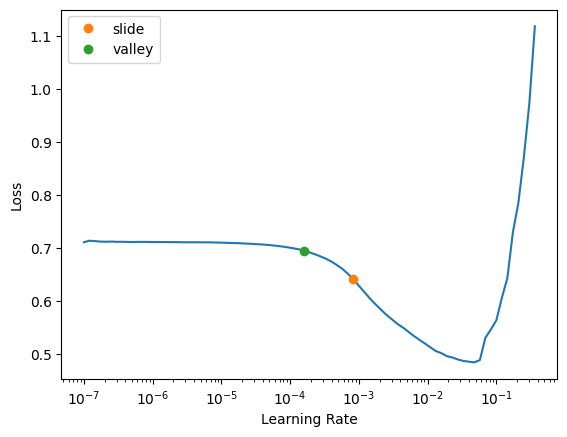

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(2,0.01)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.212592,0.211313,0.893838,01:08
1,0.212383,0.207751,0.904274,01:05


In [ ]:
learner.save("cartoon-classifier-stage_colab-0")

Path('models/cartoon-classifier-stage_colab-0.pth')

In [ ]:
learner.export("models/cartoon-classifier-stage_colab-0.pkl")

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.00363078061491251, valley=2.75422871709452e-06)

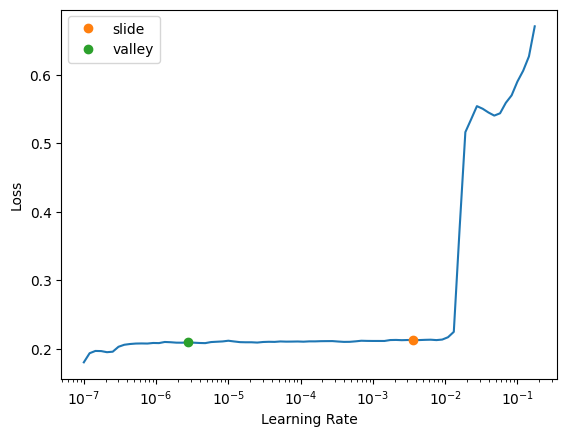

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3,slice(0.001, 0.005))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.211115,0.208966,0.893569,01:01
1,0.213621,0.208366,0.883561,01:07
2,0.211928,0.207736,0.872729,01:08


In [ ]:
learner.save("cartoon-classifier-stage-1")

Path('models/cartoon-classifier-stage-1.pth')

In [ ]:
learner.export("models/cartoon-classifier-stage-1.pkl")

In [ ]:
# revised_genres_list = df.revised_genres.to_list()
# revised_genre_count = {}
# for genres in revised_genres_list:
#   genre_list = genres
#   for genre in genre_list:
#     if genre in revised_genre_count.keys():
#       revised_genre_count[genre] += 1
#     else:
#       revised_genre_count[genre] = 1
# print(f"Number of Genres: {len(revised_genre_count)}")

Number of Genres: 56


In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

df['genre_cat_list'] = categorical_genre_list
df.shape

(22576, 5)

In [ ]:
labels = list(encode_genre_types.keys())
len(labels), labels[:5]

(56, ['Supernatural', 'Shounen', 'Action', 'Adventure', 'Sci Fi'])

In [ ]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(20319, 2257)

In [ ]:
model_path = "models/cartoon-classifier-stage-1.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf

In [ ]:
learner_inf.blurr_predict("random placeholder")

[{'labels': [],
  'scores': [],
  'class_indices': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'class_labels': ['Drama', 'Supernatural', 'Shounen', 'Mystery', 'Action', 'Fantasy', 'Romance', 'Magic', 'Superpowers', 'Promotional', 'Comedy', 'Shoujo', 'Slice of Life', 'Music', 'Sci Fi', 'Based on a Manga', 'Historical', 'Sci-Fi', 'Animal Protagonists', 'Family Friendly', 'Non-Human Protagonists', 'Horror', 'Psychological', 'Person in a Strange World', 'Based on a Light Novel', 'Space', 'Super Power', 'School Life', 'Short Episodes', 'Original Work', 'Samurai', 'Mecha', 'Parody', 'Adventure', 'Military', 'Anthropomorphic', 'Police', 'Monsters', 'Based on a Video Game', 'Ecchi', 'School', 'Harem', 'Sho

In [ ]:
learner_inf.blurr_predict("random placeholder")[0]['labels']

[]